In [108]:
! pip install numpy h5py pandas

In [109]:
import os, sys    # for handling paths
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Load the data (in h5 format)

In [110]:
Data_BSE  = h5.File('new_output_BSE_!rot.h5')
Data_SSE  = h5.File('COMPAS_Output_SSE.h5')

Inspect the data

In [111]:
list(Data_BSE.keys())

['BSE_Common_Envelopes',
 'BSE_Double_Compact_Objects',
 'BSE_RLOF',
 'BSE_System_Parameters',
 'Run_Details']

In [112]:
list(Data_SSE.keys())

['Run_Details', 'SSE_Supernovae', 'SSE_System_Parameters']

In [113]:
CE_BSE = Data_BSE['BSE_Common_Envelopes']
list(CE_BSE.keys())
merger = CE_BSE['Merger'][()]
print(merger.shape)                   # number of systems in this file
print(merger[:5])                    # the values of the first 3 entries

(18358,)
[1 1 1 1 1]


In [114]:
SP_BSE = Data_BSE['BSE_System_Parameters']
SP_SSE = Data_SSE['SSE_System_Parameters']

In [115]:
list(SP_BSE.keys())

['ID',
 'Luminosity(1)',
 'Luminosity(2)',
 'Mass@ZAMS(1)',
 'Mass@ZAMS(2)',
 'Record_Type',
 'SEED',
 'Stellar_Type(1)',
 'Stellar_Type(2)',
 'Teff(1)',
 'Teff(2)']

In [116]:
list(SP_SSE.keys())

['Ang_Momentum',
 'CH_on_MS',
 'Evolution_Status',
 'Luminosity',
 'Mass',
 'Mass@ZAMS',
 'Mass_Env',
 'Metallicity@ZAMS',
 'Omega@ZAMS',
 'PO_LBV_Factor',
 'PO_Sigma_Kick_CCSN_BH',
 'PO_Sigma_Kick_CCSN_NS',
 'PO_Sigma_Kick_ECSN',
 'PO_Sigma_Kick_USSN',
 'PO_WR_Factor',
 'Radius@ZAMS',
 'Record_Type',
 'SEED',
 'SN_Kick_Magnitude_Random_Number',
 'Stellar_Type',
 'Stellar_Type@ZAMS',
 'Teff']

Finding the unit of a parameter

In [117]:
print(SP_BSE['Teff(1)'].attrs['units']) # attrs refers to attributes

b'K'


In [118]:
print(SP_BSE['Luminosity(1)'].attrs['units'])

b'Lsol'


In [119]:
L_BSE_1 = SP_BSE['Luminosity(1)'][()]
print(L_BSE_1.shape)                   # number of systems in this file
print(L_BSE_1[:5])                    # the values of the first 3 entries

(20000,)
[1.00000000e-10 2.71140505e+03 2.10057640e+01 5.45413309e-01
 1.70725896e+00]


In [120]:
T_BSE_1 = SP_BSE['Teff(1)'][()]
print(T_BSE_1.shape)                   # number of systems in this file
print(T_BSE_1[:5])                    # the values of the first 3 entries

(20000,)
[ 4008.29935555 20801.67137952 10265.10193874  5561.33417997
  6450.14154191]


In [121]:
L_BSE_2 = SP_BSE['Luminosity(2)'][()]
T_BSE_2 = SP_BSE['Teff(2)'][()]

In [122]:
L_SSE = SP_SSE['Luminosity'][()]
print(L_SSE.shape)                   # number of systems in this file
print(L_SSE[:5])                    # the values of the first 3 entries
T_SSE = SP_SSE['Teff'][()]
print(T_SSE.shape)                   # number of systems in this file
print(T_SSE[:5])                    # the values of the first 3 entries

(75000,)
[ 0.44208346  5.90186228 93.60656714  2.75878624  4.24579915]
(75000,)
[ 5378.08264143  7818.78582496 13344.80882652  6819.88165121
  7305.052703  ]


In [123]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [124]:
binary = pd.DataFrame({
           'L': L_BSE_1+L_BSE_2,
           'Teff': T_BSE_1+T_BSE_2,
           'type1': SP_BSE['Stellar_Type(1)'][()],
           'type2': SP_BSE['Stellar_Type(2)'][()]
})

single = pd.DataFrame({
           'L': L_SSE,
           'Teff': T_SSE,
           'type': SP_SSE['Stellar_Type'][()]
})

single = restrict(single, 'type', 0, 1) #MS stars only
binary = restrict(binary, 'type1', 0, 1) #MS stars only
binary = restrict(binary, 'type2', 0, 1) #MS stars only

HRD (Main sequence)

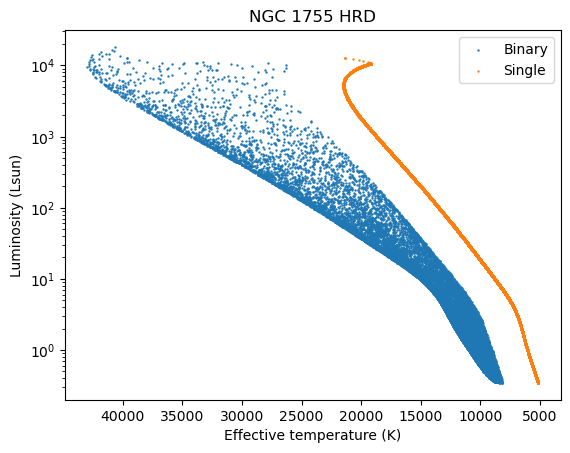

In [125]:
plt.scatter(binary.Teff, binary.L, label = 'Binary', s = 0.5)
plt.scatter(single.Teff, single.L, label = 'Single', s = 0.5)
plt.gca().invert_xaxis()
plt.title('NGC 1755 HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

In [126]:
before_data  = h5.File('COMPAS_Output.h5')
SP_before = before_data['BSE_System_Parameters']
before = pd.DataFrame({
           'L': SP_before['Luminosity(1)'][()] + SP_before['Luminosity(2)'][()],
           'Teff': SP_before['Teff(1)'][()] + SP_before['Teff(2)'][()],
           'type1': SP_before['Stellar_Type(1)'][()],
           'type2': SP_before['Stellar_Type(2)'][()]
})
before = restrict(before, 'type1', 0, 1) #MS stars only
before = restrict(before, 'type2', 0, 1) #MS stars only

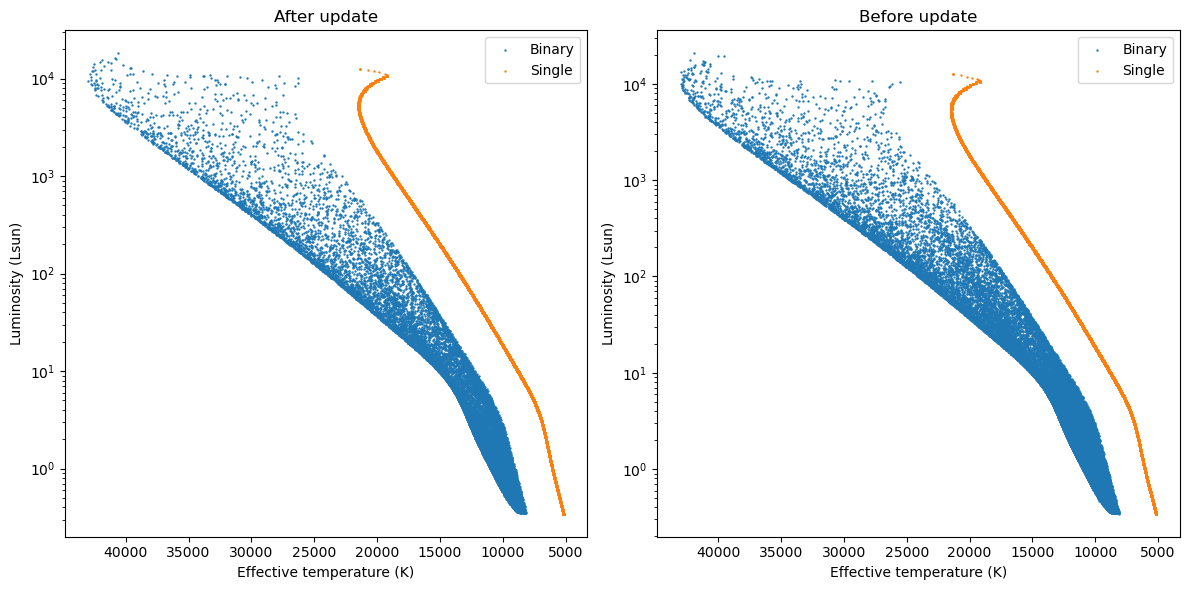

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].scatter(binary.Teff, binary.L, label = 'Binary', s = 0.5)
axes[0].scatter(single.Teff, single.L, label = 'Single', s = 0.5)
axes[0].invert_xaxis()
axes[0].set_title('After update')
axes[0].set_xlabel('Effective temperature (K)')
axes[0].set_ylabel('Luminosity (Lsun)')
axes[0].set_yscale('log')
axes[0].legend()

axes[1].scatter(before.Teff, before.L, label = 'Binary', s = 0.5)
axes[1].scatter(single.Teff, single.L, label = 'Single', s = 0.5)
axes[1].invert_xaxis()
axes[1].set_title('Before update')
axes[1].set_xlabel('Effective temperature (K)')
axes[1].set_ylabel('Luminosity (Lsun)')
axes[1].set_yscale('log')
axes[1].legend()

fig.tight_layout()

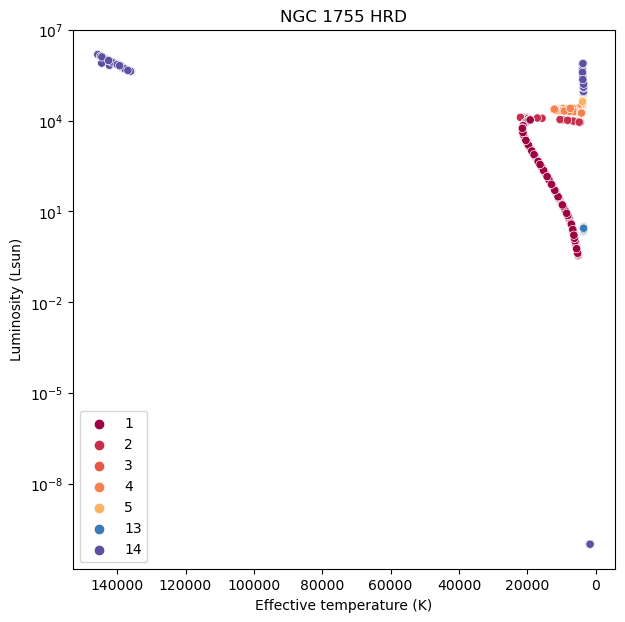

In [128]:
SSE_data = pd.DataFrame({
    'T': T_SSE,
    'L': L_SSE,
    'type': SP_SSE['Stellar_Type'][()]
})
plt.figure(figsize=(7, 7))
sns.scatterplot(data=SSE_data, x='T', y='L', hue='type', palette='Spectral', legend='full')
plt.gca().invert_xaxis()
plt.title('NGC 1755 HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

In [129]:
df = pd.read_csv('n1755_decont.csv')
df = df.drop(columns = {'X', 'Y'})
df.head(3)

,F814W,F336W
0,20.7856,21.2180
1,20.5492,20.8215
2,21.4685,22.2934


Text(0.5, 1.0, 'NGC 1755')

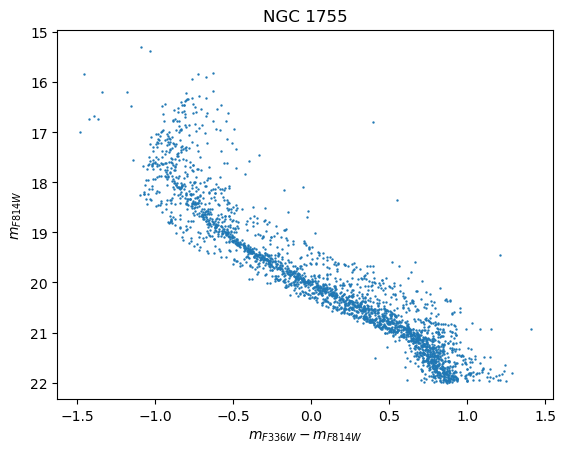

In [130]:
plt.scatter(df.F336W-df.F814W, df.F814W, s = 0.5)
plt.xlabel(r'$m_{F336W}-m_{F814W}$')
plt.ylabel(r'$m_{F814W}$')
plt.gca().invert_yaxis()
plt.title('NGC 1755')

In [131]:
def convert_to_lum(m):
  #refer to https://www.nature.com/articles/s41550-021-01597-5
  m = np.array(m)
  M = m - 18.29
  L = (3.0128e28)*np.power(10,-0.4*M) #in W
  L /= 3.827e+26 # in solar 
  return L

In [132]:
L = convert_to_lum(df.F814W)
L

array([  7.90445335,   9.82724629,   4.21416796, ..., 761.78398887,
       475.85193586, 486.26368894])

In [133]:
def convert_to_teff(mag_336, mag_814):
  colour = mag_336 - mag_814 # B - I 
  return 6800 - 4700*colour

def convert_to_teff(mag_336, mag_814):
  colour = mag_336 - mag_814 - 0.14
  return 4600*((1/(0.92*colour + 1.7)) + (1/(0.92*colour + 0.62)))

In [134]:
Teff = convert_to_teff(df.F336W, df.F814W)
print(np.max(Teff))

13771.509999999991


Text(0.5, 1.0, 'NGC 1755')

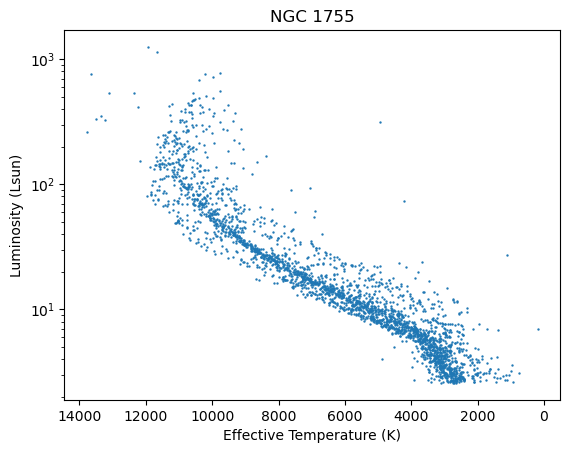

In [135]:
plt.scatter(Teff, L, s = 0.5)
plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.gca().invert_xaxis()
plt.yscale('log')
plt.title('NGC 1755')

In [136]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [137]:
results_BSE = {'Teff': T_BSE_1+T_BSE_2,
           'L': L_BSE_1+L_BSE_2,
           'type1': SP_BSE['Stellar_Type(1)'][()],
           'type2': SP_BSE['Stellar_Type(2)'][()]}

# Create DataFrame
simul_BSE = pd.DataFrame(results_BSE)
simul_BSE = restrict(simul_BSE, 'Teff', np.min(Teff), np.max(Teff))
simul_BSE = restrict(simul_BSE, 'L', np.min(L), np.max(L))
simul_BSE = restrict(simul_BSE, 'type1', 0, 14) #exclude massless remnant
simul_BSE = restrict(simul_BSE, 'type2', 0, 14)

In [138]:
results_SSE = {'Teff': T_SSE,
           'L': L_SSE,
           'type': SP_SSE['Stellar_Type'][()]
}

# Create DataFrame
simul_SSE = pd.DataFrame(results_SSE)
simul_SSE = restrict(simul_SSE, 'Teff', np.min(Teff), np.max(Teff))
simul_SSE = restrict(simul_SSE, 'L', np.min(L), np.max(L))
#simul_SSE = restrict(simul_SSE, 'type', 0, 14)

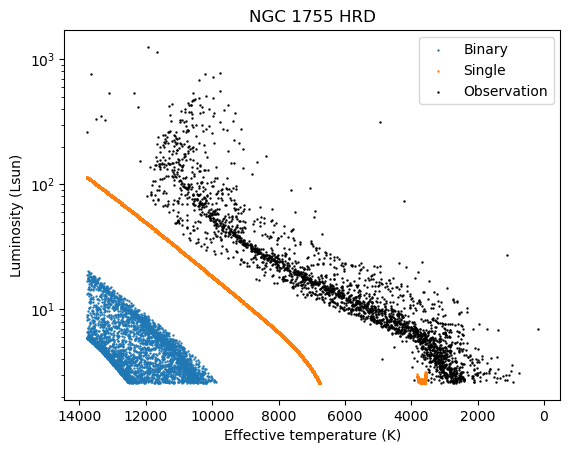

In [139]:
plt.scatter(simul_BSE.Teff, simul_BSE.L, label = 'Binary', s = 0.5)
plt.scatter(simul_SSE.Teff, simul_SSE.L, label = 'Single', s = 0.5)
plt.scatter(Teff, L, s = 0.5, c='k', label = 'Observation')
plt.gca().invert_xaxis()
plt.title('NGC 1755 HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()
